In [2]:
# Load Libraries
import pandas as pd
from matplotlib import pyplot
import numpy as np
import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [27]:
# Get Data
series = pd.read_csv('https://raw.githubusercontent.com/veeranalytics/Forecasting-RNN-Python/master/Sales_Data.csv')

In [29]:
# Create a new column (Date) to capture date information in date format
series['Date'] = series['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Delete original Date (Month) variable from dataframe
del series['Month']

# Set date as index
series.set_index('Date', inplace=True)

In [30]:
# take a look at the data (first five obs)
series.head()

,Sales
Date,
2006-01-01,112
2006-02-01,118
2006-03-01,132
2006-04-01,129
2006-05-01,121


In [31]:
# Take a look at variable data types-- only one variable is there- Sales, Date variable has become index
# Converting Date variable to index helps in performing forecasting easier.
series = series.astype('float32')
series.dtypes

Sales    float32
dtype: object

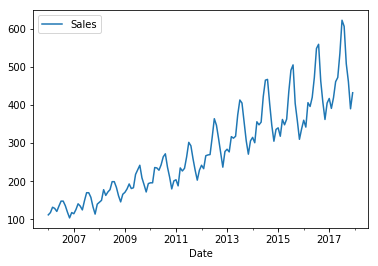

In [32]:
# Show plot
series.plot()
pyplot.show()

## Findings:
## As the the plot-- there is an increasing linear trend as well as some seasonality component.
## The series has a clear trend-- this suggests that the time series is not stationary and 
## will require differencing to make it stationary, at least a difference order of 1.
## Will fit an ARIMA model.

In [33]:
# Out of Sample Forecast Using ARIMA
# Divide series in to train ans test datasets
X = series.values
size = int(len(X) * 0.83)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

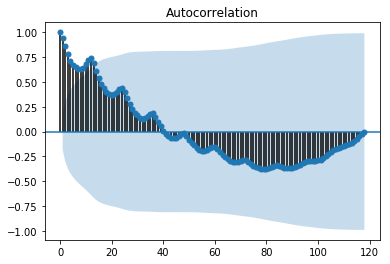

In [34]:
# Checking Autocorrelation factor
# Autocorrelation: is the correlation between series values that are k intervals apart.
acf_plot = plot_acf(train)

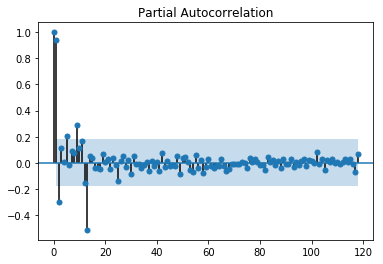

In [35]:
# Checking Partial Autocorrelation factor
# Autocorrelation: is the correlation between series values that are k intervals apart.
pacf_plot = plot_pacf(train)

## Findings:
## ACF: There is a positive correlation with the first 10 to 12 lags, perhaps significant for the first 3 lags only.
## This suggest of MA(6) model.
## PACF: The correlation is significant for the first 03 lags only, this suggests of AR(3) model.
## We will go with ARIMA(3,1,6) model.

In [36]:
# Fit ARIMA model
model = ARIMA(train, order=(3,1,6))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  118
Model:                 ARIMA(3, 1, 6)   Log Likelihood                -520.605
Method:                       css-mle   S.D. of innovations             18.666
Date:                Sun, 20 May 2018   AIC                           1063.210
Time:                        18:01:54   BIC                           1093.687
Sample:                             1   HQIC                          1075.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3165      0.331      7.003      0.000       1.668       2.965
ar.L1.D.y      1.6942      0.078     21.774      0.000       1.542       1.847
ar.L2.D.y     -1.6818      0.078    -21.425      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


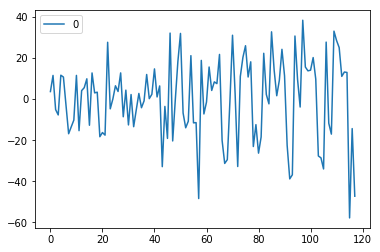

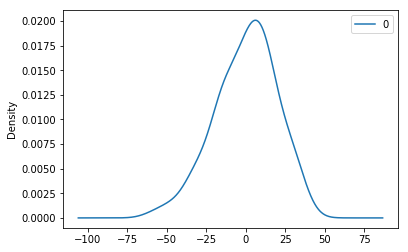

                0
count  118.000000
mean    -0.035142
std     19.327681
min    -57.820539
25%    -12.672067
50%      2.312152
75%     12.767086
max     38.407183


In [37]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [40]:
# Predict sales for next 07 months to comapre with test data
start_index = 119
end_index = 144
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


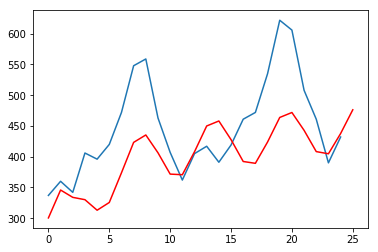

In [41]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [42]:
# Print Errors
error = ((predictions - test) ** 2).mean(axis=None)
print('Test MSE: %.3f' % error)

Test MSE: 10701.265


In [43]:
# Forecast sales for next 24 months
start_index = 144
end_index = 168
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


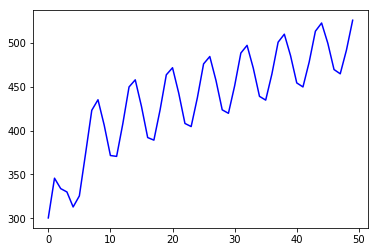

In [44]:
pyplot.plot(forecast, color='blue')
pyplot.show()